<a href="https://colab.research.google.com/github/maaniaxs/Deep-Learning/blob/main/MNIST_ANN_18_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten,Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Load the MNIST dataset

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
y_test.shape

(10000,)

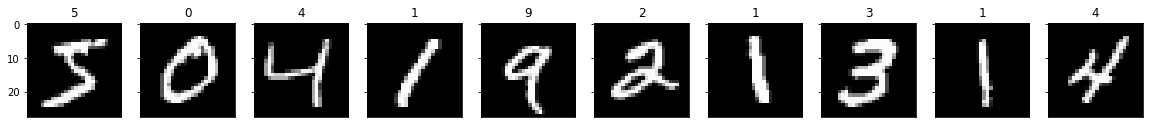

In [4]:
fig, axes = plt.subplots(ncols= 10,sharex=False,sharey=True, figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)

plt.show()

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# after converting categorical variable
print(y_test[3])
print(y_test.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10000, 10)


In [8]:
x_train= x_train/255
x_test= x_test/255               ## scaling input-data in (0-1) range

In [17]:
#
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation= 'LeakyReLU'))
model.add(Dropout(0.20))
model.add(Dense(64, activation= 'LeakyReLU'))
model.add(Dense(10, activation= 'softmax'))
# compile model
model.compile(loss= 'categorical_crossentropy',optimizer='adam', metrics= ['acc'] )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


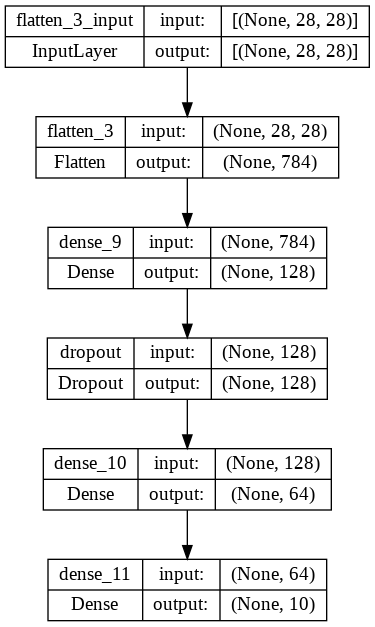

In [18]:
utils.plot_model(model, show_shapes=True)

In [19]:
model.fit(x_train,y_train, epochs=10, validation_data= (x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2963 - acc: 0.9119 - val_loss: 0.1563 - val_acc: 0.9523
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1656 - acc: 0.9504 - val_loss: 0.1217 - val_acc: 0.9626
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1333 - acc: 0.9589 - val_loss: 0.1135 - val_acc: 0.9649
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1158 - acc: 0.9646 - val_loss: 0.1057 - val_acc: 0.9686
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1016 - acc: 0.9689 - val_loss: 0.0988 - val_acc: 0.9673
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0933 - acc: 0.9702 - val_loss: 0.1078 - val_acc: 0.9676
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0853 - acc: 0.9729 - val_loss: 0.0983 - val_acc: 0.9695
Epoch 8/10
1875/1875 [==============================] - 7s 4ms

In [22]:

## with Relu activation function
model_2= Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.20))
model_2.add(Dense(64, activation= 'relu'))
model_2.add(Dense(10, activation= 'softmax'))
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_2.compile(loss= 'categorical_crossentropy',optimizer='adam', metrics= ['acc'] )  # compile model_2

history = model_2.fit(x_train,y_train, epochs=10, validation_data= (x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2415 - acc: 0.9294 - val_loss: 0.1233 - val_acc: 0.9615
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1016 - acc: 0.9692 - val_loss: 0.0924 - val_acc: 0.9706
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0708 - acc: 0.9780 - val_loss: 0.0839 - val_acc: 0.9736
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0546 - acc: 0.9826 - val_loss: 0.0872 - val_acc: 0.9731
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - acc: 0.9861 - val_loss: 0.0823 - val_acc: 0.9759
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0346 - acc: 0.9886 - val_loss: 0.0793 - val_acc: 0.9767
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0298 - acc: 0.9901 - val_loss: 0.0931 - val_acc: 0.9741
Epoch 8/10
1875/1875 [==============================] - 7s 4ms

In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf

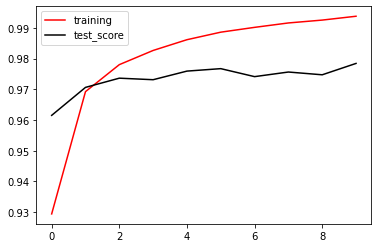

In [29]:
##
plt.plot(history.history['acc'], color= 'red', label= 'training')
plt.plot(history.history['val_acc'], color= 'k', label= 'test_score')
plt.legend()
plt.show()

In [33]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Saving the model 
 predict the x_test

In [35]:
model.save('/content/drive/MyDrive/Colab Notebooks/mnist_model.h5')   # model save in google drive

In [37]:
import keras
model_2 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/mnist_model.h5')

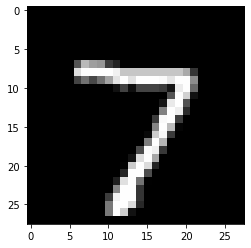

In [39]:
#
plt.imshow(x_test[0], cmap='gray')

In [43]:
import numpy as np

print(x_test[0].shape)
# we have to changed the shape of data for prediction
x= np.reshape(x_test[0], (1,28,28))
x.shape

(28, 28)


(1, 28, 28)

In [47]:
pred = model_2.predict(x)  # it gives a probability of all classes and which class probability has more that will be our result
print(np.argmax(pred))   # 

1/1 [==============================] - 0s 22ms/step
7
